In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss

In [40]:
# Load the dataset from excel sheet for processing
data_path = "heart_2020_cleaned.csv"
dataset = pd.read_csv(data_path)

In [41]:
# Check number of rows & columns in the dataset
print("Initial data shape:", dataset.shape)

Initial data shape: (319795, 18)


In [50]:
# Check first five rows of dataset
print("First five rows of the dataset:\n", dataset.head())


First five rows of the dataset:
   HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes   

In [51]:
#overview of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [52]:
# Removes duplicate rows from the dataset
dataset.drop_duplicates(inplace=True)

In [54]:
# Checking number of rows & columns after dropping duplicates
print("Dataset shape after dropping duplicate Values:", dataset.shape)

Dataset shape after dropping duplicate Values: (301717, 18)


In [53]:
# Calculates and prints the number of missing values in each column.
missing_values = dataset.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [55]:
# Preprocessing, Encoding categorical variables
categorical_cols = dataset.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True)

In [56]:
# Display the first few rows of the new dataframe to verify encoding
print("Encoded Dataframe First rows:\n", data_encoded.head())

Encoded Dataframe First rows:
      BMI  PhysicalHealth  MentalHealth  SleepTime  HeartDisease_Yes  \
0  16.60             3.0          30.0        5.0             False   
1  20.34             0.0           0.0        7.0             False   
2  26.58            20.0          30.0        8.0             False   
3  24.21             0.0           0.0        6.0             False   
4  23.71            28.0           0.0        8.0             False   

   Smoking_Yes  AlcoholDrinking_Yes  Stroke_Yes  DiffWalking_Yes  Sex_Male  \
0         True                False       False            False     False   
1        False                False        True            False     False   
2         True                False       False            False      True   
3        False                False       False            False     False   
4        False                False       False             True     False   

   ...  Diabetic_Yes  Diabetic_Yes (during pregnancy)  PhysicalActivity_Y

In [57]:
#  Splits the data into training and testing sets
X = data_encoded.drop('HeartDisease_Yes', axis=1)  # Adjust the column name if necessary
y = data_encoded['HeartDisease_Yes']  # Adjust the column name if necessary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
# Standardizes the features to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [59]:
# Initializes and trains the logistic regression model with a higher number of iterations
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [60]:
# Predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

In [34]:
# Training and Testing scores
train_score = logistic_model.score(X_train_scaled, y_train)
test_score = logistic_model.score(X_test_scaled, y_test)

print("Training Score:", train_score)
print("Testing Score:", test_score)

Training Score: 0.9113902549166643
Testing Score: 0.9107616333023996


In [61]:
# Calculates and prints various performance metrics
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Precision Score: 0.5303454715219421
Recall Score: 0.10422018348623853
Accuracy Score: 0.9107616333023996
F1 Score: 0.17420641005980678


In [62]:
# Log Loss metrics
log_loss_val = log_loss(y_test, y_pred_proba)
print("Log Loss:", log_loss_val)

Log Loss: 0.24021010552570374


In [63]:
# Displays a detailed classification report and confusion matrix
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.99      0.95     54894
        True       0.53      0.10      0.17      5450

    accuracy                           0.91     60344
   macro avg       0.72      0.55      0.56     60344
weighted avg       0.88      0.91      0.88     60344

Confusion Matrix:
 [[54391   503]
 [ 4882   568]]


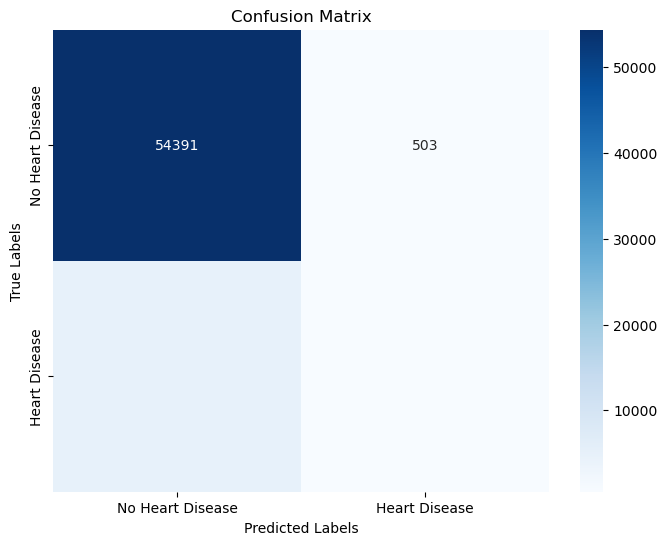

In [37]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

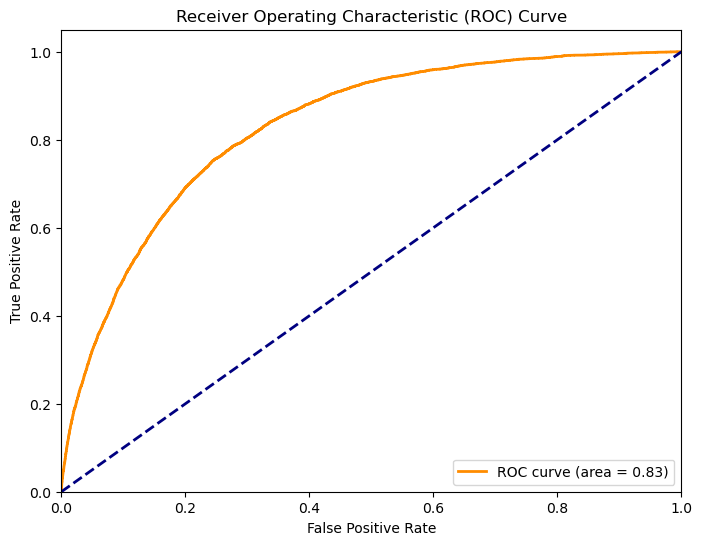

In [47]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()